### Author: Tejaswini Raghavendra Kamath
### The Sparks Foundation: Data Science and Business Analytics (GRIP June '21)


### Task 1: Prediction using Supervised ML model 

#### Problem Statement

This task requires a Supervised ML model to be built to understand the correlation between number of hours studied and expected score.

#### Task to be performed

Depending on the model generated, expected score when studying for 9.25 hours needs to be predicted.

#### Step 1: Reading and Understanding the Data and visualization

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# Reading data from remote link
students = pd.read_csv("http://bit.ly/w-data")
students.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
students.shape

(25, 2)

In [4]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


There are 25 lines of data. 

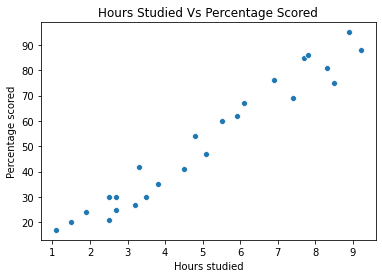

In [5]:
#Plotting the distribution of scores
sns.scatterplot(data=students, x= 'Hours',y='Scores')
plt.title('Hours Studied Vs Percentage Scored')
plt.xlabel('Hours studied')
plt.ylabel('Percentage scored')
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.<br>
With only 2 variables - Hours(independent variable) and Scores(dependent variable), this can be modelled using Simple Linear Regression.


#### Step 2: Data preparation

In [6]:
# Splitting data into input variable X and target variable y
X = students['Hours']
y=students['Scores']

In [7]:
X.head()


0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
Name: Hours, dtype: float64

In [8]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

#### Step 3: Splitting the Data into Training and Testing Sets

In [9]:
# Splitting to train and test
np.random.seed(0)
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=42)

In [10]:
print('Length of train dataset is: ',len(X_train))
print('Length of test dataset is: ',len(X_test)) 

Length of train dataset is:  17
Length of test dataset is:  8


In [11]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(17, 1)
(17,)
(8, 1)
(8,)


#### Step 4: Building a linear model

In [13]:
# Using linear regression from scikit learn to model data
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [14]:
# Printing the parameters
print(lr.intercept_)
print(lr.coef_)

2.794196676599803
[9.71054094]


The equation we get is:
Percentage_scores = 2.794+9.71*Number_of_hours_Studied

In [15]:
# Make predictions
y_train_pred = lr.predict(X_train)

In [16]:
# Evaluate the model

print(r2_score(y_true=y_train,y_pred=y_train_pred))

0.9536486503889446


The r2 score value = 0.95 shows a very good fit

#### Step 5: Predictions on the Test Set

In [17]:
y_pred = lr.predict(X_test)

In [18]:
# Comparing Actual and predicted
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df.head()

,Actual,Predicted
8,81,83.391686
16,30,27.070549
0,21,27.070549
23,76,69.796929
11,62,60.086388


In [19]:
print(r2_score(y_true=y_test,y_pred=y_pred))

0.9487647340257012


The r2 score for test set is very close to that for train set indicating that the model is not overfitted.

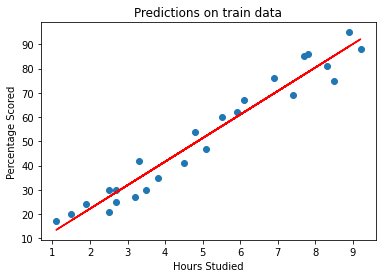

In [20]:
# Plotting the above equation
line = float(lr.intercept_)+float(lr.coef_)*X

# Plotting for train dataset
plt.scatter(X,y)
plt.plot(X,line,'r')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.title('Predictions on train data')
plt.show()

It can be observed that the actual data is very close to the predicted values.


#### Step 6: Predicting the scores for requested number of hours

In [21]:
hours = 9.25
score_pred = lr.predict([[hours]])
print('Number of hours studied = {}'.format(hours))
print('Predicted score = {}'.format(score_pred[0]))

Number of hours studied = 9.25
Predicted score = 92.61670033840096
